# Clustering - Hierarchical (Airlines)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Clustering\\Eastwestairlines.csv")
df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df=df.drop(['ID#'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Normalization Function

def norm_function(x):
    i=(x-x.min())/(x.max()-x.min())
    return(i)

In [5]:
stand_fun=norm_function(df)
stand_fun

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [6]:
standnorm=StandardScaler().fit_transform(df)
np.round(standnorm,2)

array([[-0.45, -0.19, -0.77, ..., -0.36,  1.4 , -0.77],
       [-0.54, -0.19, -0.77, ..., -0.36,  1.38, -0.77],
       [-0.32, -0.19, -0.77, ..., -0.36,  1.41, -0.77],
       ...,
       [-0.  , -0.19,  0.68, ..., -0.36, -1.32,  1.3 ],
       [-0.19, -0.19, -0.77, ..., -0.1 , -1.32, -0.77],
       [-0.7 , -0.19, -0.77, ..., -0.36, -1.32, -0.77]])

In [36]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [37]:
model1=pd.DataFrame(model.fit_predict(stand_fun),columns=['clustersid'])
model1


,clustersid
0,0
1,0
2,0
3,0
4,3
...,...
3994,1
3995,1
3996,1
3997,0


In [38]:
df['clusterid']=model.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [39]:
df['clusterid'].value_counts()

0    1710
1     946
2     808
3     535
Name: clusterid, dtype: int64

In [40]:
df.groupby('clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusterid,,,,,,,,,,,
0,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
1,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0


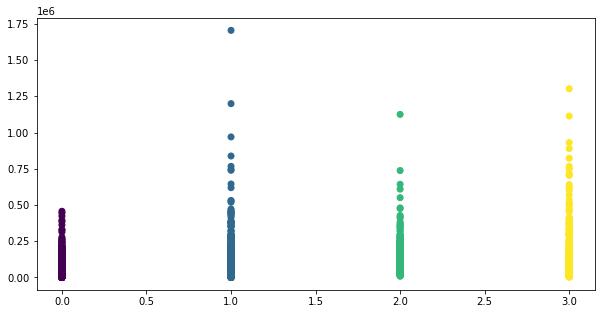

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(df['clusterid'],df['Balance'],c=model.labels_)
plt.show()

# Clustering - DBSCAN (Airlines)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [103]:
airline_db=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Clustering\\Eastwestairlines.csv")
airline_db

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [104]:
airline_db=airline_db.drop('ID#',axis=1)

In [105]:
airline_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [106]:
airline_dbnorm=StandardScaler().fit_transform(airline_db)
airline_dbnorm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [107]:
dbscan=DBSCAN(eps=1,min_samples=8)
dbscan.fit(airline_dbnorm)

DBSCAN(eps=1, min_samples=8)

In [108]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [109]:
airline_db['clusters']=dbscan.labels_
airline_db

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [110]:
airline_db

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [111]:
airline_db['clusters'].value_counts()

 0    2293
 1    1055
-1     640
 2      11
Name: clusters, dtype: int64

In [112]:
airline_db=airline_db.groupby('clusters').mean().reset_index()
airline_db

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-1,174568.814062,880.715625,2.667187,1.073438,1.076563,37807.162500,21.151563,2053.550000,5.932812,4707.593750,0.665625
1,0,52629.739206,2.455299,1.655037,1.000000,1.000000,8975.535107,8.412124,112.624945,0.371566,3790.366768,0.000000
2,1,58403.466351,6.659716,2.581043,1.000000,1.000000,22452.773460,12.739336,253.072986,0.798104,4489.313744,1.000000
3,2,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.000000


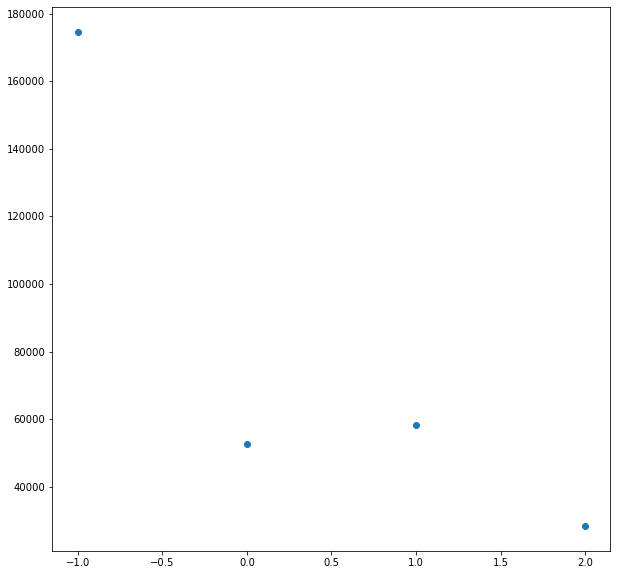

In [113]:
plt.figure(figsize=(10,10))
plt.scatter(airline_db['clusters'],airline_db['Balance'])


# Clustering - KMeans (Airlines)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
airline_k=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Clustering\\Eastwestairlines.csv")
airline_k

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
airline_k=airline_k.drop('ID#',axis=1)

In [27]:
airline_k

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [28]:
 # normalize the data points
norm_airline_k=StandardScaler().fit_transform(airline_k)
norm_airline_k

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [29]:
array=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=3)
    kmeans.fit(norm_airline_k)
    array.append(kmeans.inertia_)

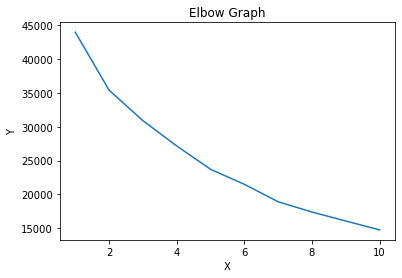

In [30]:
plt.plot(range(1,11),array)
plt.title("Elbow Graph")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

 * K-Means

In [31]:
airline_k1=KMeans(4,random_state=30).fit(norm_airline_k)

In [32]:
airline_k1.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [33]:
airline_k['nclusters']=airline_k1.labels_
airline_k

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,nclusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [34]:
airline_k.groupby('nclusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
nclusters,,,,,,,,,,,
0,43828.396152,97.283863,1.223007,1.019238,1.000393,4707.805654,6.926973,201.254417,0.624656,3693.855124,0.201413
1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
3,117087.423649,156.736883,3.697729,1.002349,1.001566,39200.451057,18.761942,348.499608,1.029757,4885.918559,0.649961


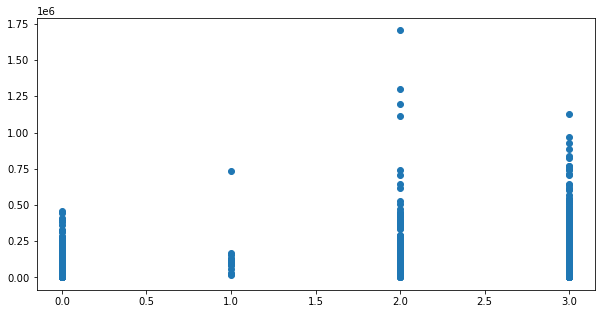

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(airline_k['nclusters'],airline_k['Balance'])

  # Clustering - Hierarchical (Crime_data)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [34]:
crime_data=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Clustering\\crime_data.csv",index_col=0)
crime_data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [35]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [36]:
np.shape(crime_data)

(50, 4)

In [38]:
normal=StandardScaler().fit_transform(crime_data)

In [39]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')


In [40]:
model1=pd.DataFrame(model.fit_predict(normal),columns=['cluster'])


In [44]:
crime_data['cluster']=model.labels_
crime_data

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3


In [48]:
crime_data.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.613333,138.866667,75.266667,19.493333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714
4,8.450000,154.000000,56.250000,18.025000


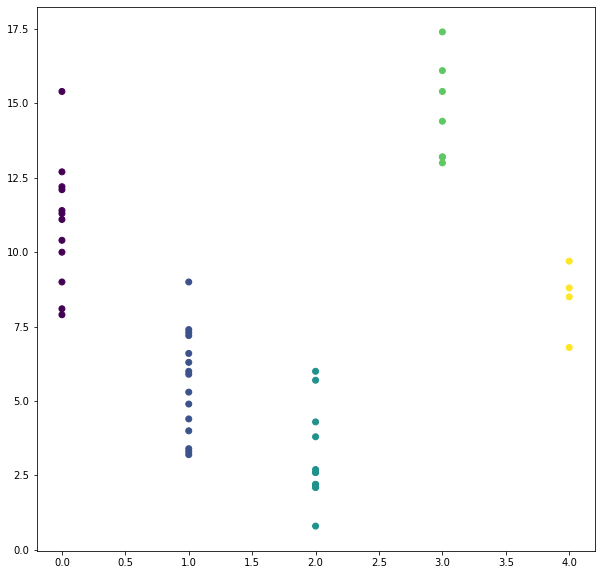

In [54]:
plt.figure(figsize =(10,10))
plt.scatter(crime_data['cluster'],crime_data['Murder'],c=model.labels_)
plt.show()

# DBSCAN (Crime_data)

In [59]:
from sklearn.cluster import DBSCAN

In [56]:
db_crime=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Clustering\\crime_data.csv",index_col=0)

In [57]:
db_crimestand=StandardScaler().fit_transform(db_crime)

In [61]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(db_crimestand)

DBSCAN(eps=1, min_samples=4)

In [64]:
dbscan=model.labels_

In [65]:
db_crime['clusters']=model.labels_
db_crime

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3


In [68]:
db_crime.groupby('clusters').mean()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.613333,138.866667,75.266667,19.493333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714
4,8.450000,154.000000,56.250000,18.025000


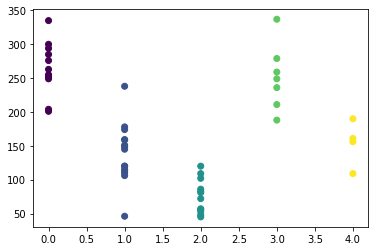

In [69]:
plt.scatter(db_crime['clusters'],db_crime['Assault'],c=model.labels_)
plt.show()

#  K-Means (Crime_data)

In [78]:
from sklearn.cluster import KMeans

In [71]:
k_crime=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Clustering\\crime_data.csv",index_col=0)
k_crime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [74]:
K_norm=StandardScaler().fit_transform(k_crime)

In [81]:
array=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=3)
    kmeans.fit(K_norm)
    array.append(kmeans.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


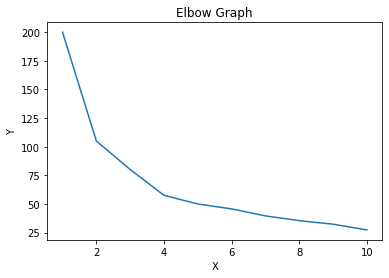

In [82]:
plt.plot(range(1,11),array)
plt.title("Elbow Graph")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [83]:
model=KMeans(5,random_state=30).fit(K_norm)

In [87]:
k_crime['cluster']=model.labels_
k_crime

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


In [88]:
k_crime.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.753333,143.466667,64.533333,19.986667
1,14.671429,251.285714,54.285714,21.685714
2,10.966667,264.000000,76.500000,33.608333
3,2.680000,70.100000,51.000000,10.910000
4,4.500000,126.333333,83.500000,16.266667


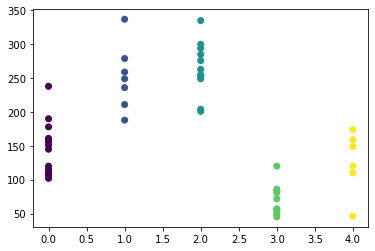

In [90]:
plt.scatter(k_crime['cluster'],k_crime['Assault'],c=model.labels_)
plt.show()